In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading and Understanding the Datasets

In [2]:
hData = pd.read_csv('Datasets\Hospitalisation details.csv')
print('Hospitalisation Data Loaded Successfully')
mData = pd.read_csv('Datasets\Medical Examinations.csv')
print('Medical Examinations Data Loaded Successfully')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/healthcare-costs-prediction-dataset/Hospitalisation details.csv'

**Hospitalisation Dataset**

In [ ]:
hData

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013


In [ ]:
hData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


**Medical Examinations Dataset**

In [ ]:
mData

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...
2330,Id2331,22.340,5.57,No,No,No,1,No
2331,Id2332,17.700,6.28,No,No,No,1,No
2332,Id2333,16.470,6.35,No,No,Yes,1,No
2333,Id2334,17.600,4.39,No,No,No,1,No


In [ ]:
mData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


**Merging the Datasets**

In [ ]:
df = pd.merge(hData, mData, on='Customer ID', how='inner')
df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes


# Working on merged Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [ ]:
df.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker'],
      dtype='object')

**Data Cleaning**
* Convert columns with object types that represent categories or binary values to appropriate formats (e.g., categorical or boolean).
* Ensure numerical columns have the correct data types.
* Handle any missing values if necessary (though your dataset appears to have no missing values).

In [ ]:
# Convert appropriate columns to categorical
categorical_columns = ['Hospital tier', 'City tier', 'Heart Issues', 'Any Transplants', 'Cancer history', 'smoker']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check for missing values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Verify the replacement
print(df.isnull().sum())


Customer ID               0
year                      2
month                     3
date                      0
children                  0
charges                   0
Hospital tier             1
City tier                 1
State ID                  2
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    2
dtype: int64


/tmp/ipykernel_33/3048518607.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('?', np.nan, inplace=True)


**Handling missing values**

In [ ]:
df[df['year'].isnull()]
df[df['Hospital tier'].isnull()]
df[df['City tier'].isnull()]
df[df['State ID'].isnull()]
df[df['smoker'].isnull()]


,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
1700,Id635,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,NaN
1775,Id560,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,NaN


**AS there is not much Null Values are there, so its better to remove them, it will not affect our prediction**

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64


**Creating a new column 'age'**

In [ ]:
# Convert the 'year' column to integer if necessary
df['year'] = df['year'].astype(int)

# Calculate the age
present_year = 2024
df['age'] = present_year - df['year']

# Optionally, you can delete the 'year' column if it is no longer needed
df.drop(columns=['year','month','date'], inplace=True)

df

,Customer ID,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age
0,Id2335,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,32
1,Id2334,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,32
2,Id2333,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,31
3,Id2332,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,32
4,Id2331,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,0,52590.83,tier - 1,tier - 3,R1011,32.800,6.59,No,No,No,No major surgery,yes,62
2330,Id5,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,35
2331,Id4,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,33
2333,Id2,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             2325 non-null   object  
 1   children                2325 non-null   int64   
 2   charges                 2325 non-null   float64 
 3   Hospital tier           2325 non-null   category
 4   City tier               2325 non-null   category
 5   State ID                2325 non-null   object  
 6   BMI                     2325 non-null   float64 
 7   HBA1C                   2325 non-null   float64 
 8   Heart Issues            2325 non-null   category
 9   Any Transplants         2325 non-null   category
 10  Cancer history          2325 non-null   category
 11  NumberOfMajorSurgeries  2325 non-null   object  
 12  smoker                  2325 non-null   category
 13  age                     2325 non-null   int64   
dtypes: category(6), float64(3), i

In [ ]:
df['State ID'].nunique()

16

**Encoding**

In [ ]:
# Columns to encode
label_c2e = ['Hospital tier','City tier','Heart Issues','Any Transplants','Cancer history','smoker']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in label_c2e:
    # Initialize LabelEncoder for each column
    label_encoders[column] = LabelEncoder()
    # Fit LabelEncoder on the column and transform the data
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
df

,Customer ID,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age
0,Id2335,0,563.84,1,2,R1013,17.580,4.51,0,0,0,1,0,32
1,Id2334,0,570.62,1,0,R1013,17.600,4.39,0,0,0,1,0,32
2,Id2333,0,600.00,1,0,R1013,16.470,6.35,0,0,1,1,0,31
3,Id2332,0,604.54,2,2,R1013,17.700,6.28,0,0,0,1,0,32
4,Id2331,0,637.26,2,2,R1013,22.340,5.57,0,0,0,1,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,0,52590.83,0,2,R1011,32.800,6.59,0,0,0,No major surgery,1,62
2330,Id5,0,55135.40,0,1,R1012,35.530,5.45,0,0,0,No major surgery,1,35
2331,Id4,1,58571.07,0,2,R1024,38.095,6.05,0,0,0,No major surgery,1,33
2333,Id2,0,62592.87,1,2,R1013,30.360,5.77,0,0,0,No major surgery,1,47


In [ ]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery', 0)
df

,Customer ID,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age
0,Id2335,0,563.84,1,2,R1013,17.580,4.51,0,0,0,1,0,32
1,Id2334,0,570.62,1,0,R1013,17.600,4.39,0,0,0,1,0,32
2,Id2333,0,600.00,1,0,R1013,16.470,6.35,0,0,1,1,0,31
3,Id2332,0,604.54,2,2,R1013,17.700,6.28,0,0,0,1,0,32
4,Id2331,0,637.26,2,2,R1013,22.340,5.57,0,0,0,1,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,0,52590.83,0,2,R1011,32.800,6.59,0,0,0,0,1,62
2330,Id5,0,55135.40,0,1,R1012,35.530,5.45,0,0,0,0,1,35
2331,Id4,1,58571.07,0,2,R1024,38.095,6.05,0,0,0,0,1,33
2333,Id2,0,62592.87,1,2,R1013,30.360,5.77,0,0,0,0,1,47


# Now my dataset is ready to visualize and use

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Hospital tier','City tier','BMI','HBA1C','Heart Issues','Any Transplants','Cancer history','NumberOfMajorSurgeries','smoker','age']]
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age
1063,1,2,27.500,6.03,0,0,0,0,0,47
1876,2,0,24.700,4.36,0,0,1,1,1,45
215,1,1,36.000,4.66,0,1,0,1,0,24
1368,2,2,36.385,11.49,0,0,0,0,0,53
1624,1,0,25.080,5.75,1,0,0,2,0,65
...,...,...,...,...,...,...,...,...,...,...
1644,1,0,21.660,5.20,1,0,0,2,0,65
1101,1,1,37.070,5.69,0,0,0,2,0,52
1136,2,1,35.970,8.13,0,0,0,0,0,53
1300,2,2,47.130,4.31,0,0,0,0,0,30


Linear Regression Mean Squared Error: 23902531.084368117
Linear Regression R^2 Score: 0.8324300644154808
Random Forest Mean Squared Error: 16808946.363424923
Random Forest R^2 Score: 0.8821600085187291


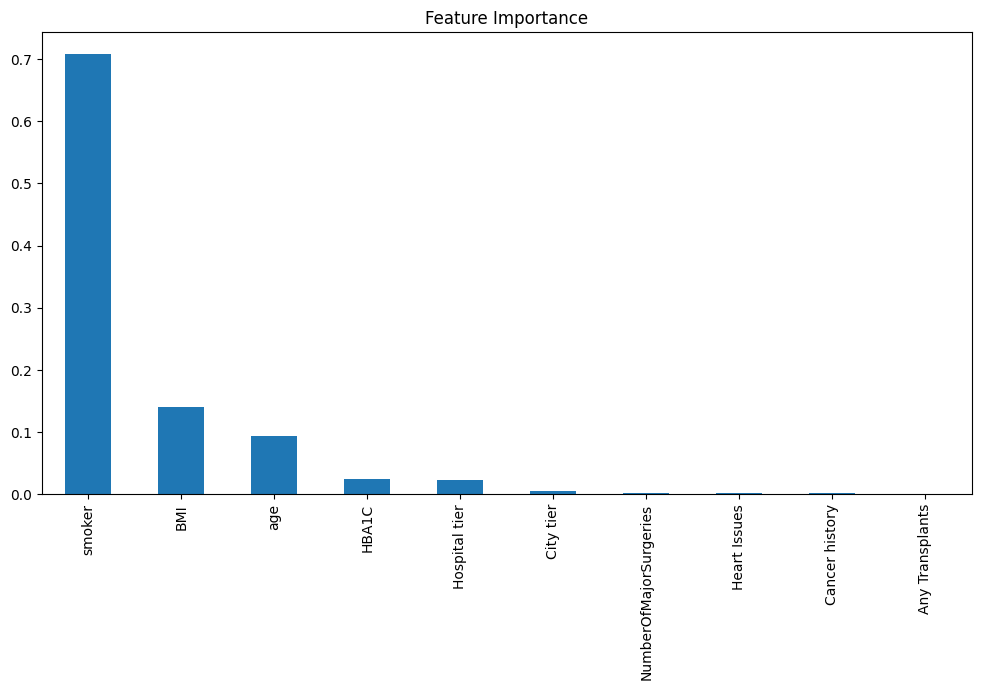

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print('Linear Regression Mean Squared Error:', mean_squared_error(y_test, y_pred_lin))
print('Linear Regression R^2 Score:', r2_score(y_test, y_pred_lin))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print('Random Forest Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest R^2 Score:', r2_score(y_test, y_pred_rf))

# Feature Importance: Random Forest
feature_importance = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()


In [ ]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation with Random Forest
# cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
# cv_rmse = (-cv_scores.mean()) ** 0.5
# print('Cross-validated RMSE:', cv_rmse)

Cross-validated RMSE: 10679.620261462323


# Now making a Pickle for this file